In [85]:
import pandas as pd
import os
import numpy as np

In [86]:
data_path = '../../new_5year_update_result/'
pf_info_path = '../../Space_Figure_and_Array/pf_info/pf_info.csv'
data_fname = os.listdir(data_path)

In [87]:
data_fname

['5y_ynm_diff_albedo_month.csv',
 '5y_ynm_diff_aqua_evi_month.csv',
 '5y_ynm_diff_aqua_ndvi_month.csv',
 '5y_ynm_diff_lst_aqua_day_month.csv',
 '5y_ynm_diff_lst_aqua_night_month.csv',
 '5y_ynm_diff_lst_terra_day_month.csv',
 '5y_ynm_diff_lst_terra_night_month.csv',
 '5y_ynm_diff_TC_pre_month.csv',
 '5y_ynm_diff_TC_tem_max_month.csv',
 '5y_ynm_diff_TC_tem_min_month.csv',
 '5y_ynm_diff_terra_evi_month.csv',
 '5y_ynm_diff_terra_ndvi_month.csv',
 '5y_ynm_diff_trmm_pre_month_sum.csv']

In [3]:
# 绘图库
import pandas as pd
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
import numpy as np
# import plotnine as p9
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %matplotlib inline
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shapereader
import matplotlib.ticker as mticker
from matplotlib import font_manager
from matplotlib.colors import TwoSlopeNorm

In [4]:
# 读取电站基础信息和地表特征信息
# 0-2 为albedo和VI
# 3-6为LST
# LST使用绝对变化量
# select_col =  list(range(0,14))
# # select_col.insert(0,1)
# # select_col.insert(0,0)
# print(select_col)
# albedo和VI 使用变化率
select_col =  list(range(14,27))
select_col.insert(0,1)
select_col.insert(0,0)
print(select_col)
pf_data = pd.read_csv(data_path+data_fname[0],usecols=select_col,index_col=['pf_id'])
pf_info = pd.read_csv(pf_info_path,index_col=['pf_id'])
# 聚合
pf_join = pf_data.join(pf_info, on='pf_id')

[0, 1, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [77]:
# pf_join

,year_mean_diff,year_diff_rate,01df_rate,02df_rate,03df_rate,04df_rate,05df_rate,06df_rate,07df_rate,08df_rate,...,MWac,Ha.,lat,lon,abs_lat,LC_merged,mean_dem,TC_pre_mean,TC_Temp,mean_Solar_radiation
pf_id,,,,,,,,,,,,,,,,,,,,,
Pc66645,-7.237670,-3.976064,-2.020474,-2.958315,0.472915,-2.899665,-2.251145,-2.657799,-3.059671,-6.955938,...,190.0,504.6,42.3975,11.5903,42.3975,croplands,54.344828,40.468571,16.115395,13494810.96
Pm63510,-9.997512,-6.566690,-10.493235,-7.557470,-8.125681,-3.908791,-7.135783,-6.552975,-8.904698,-6.460880,...,150.0,566.3,37.2280,-3.0700,37.2280,grass,1094.654701,37.188548,14.179095,16083232.56
Pm70419,-14.838752,-8.033665,2.358359,1.178642,-6.245275,-9.120708,-8.607488,-7.833429,-9.124252,-6.279951,...,100.0,547.5,37.6480,-5.2540,37.6480,croplands,136.092498,43.083333,18.093333,15101112.10
Pj60958,-10.241223,-4.114452,-3.719996,-1.460624,-3.947317,-4.048091,-2.385270,-1.430620,-2.442637,-3.116642,...,164.0,459.4,36.4000,95.1430,36.4000,Barren,2845.106990,4.650471,5.561130,14347838.05
Pm60967,-3.909190,-2.085997,-2.521128,-1.776780,-2.800461,-2.932584,-2.995414,-2.502000,-2.664145,-1.901908,...,265.5,528.4,35.3273,-119.9054,35.3273,grass,604.696019,27.644606,15.582461,16657367.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pj71159,-0.828619,-0.553679,5.577347,1.247703,-2.176769,-2.787750,-2.547583,-3.894455,-4.163945,-1.612829,...,224.0,589.2,27.0370,-109.3400,27.0370,grass,102.701695,38.084649,24.877434,17986294.00
Pj72474,-9.780712,-3.690296,-2.743326,-6.537742,-6.496143,-4.867317,-4.241980,-3.819340,-1.969407,3.321426,...,250.0,731.1,27.3680,72.1750,27.3680,Barren,217.734156,14.007554,27.290985,14171804.97
Pj72341,-3.032035,-1.667949,-10.131318,-11.106478,-3.869572,-1.077746,0.036303,-1.645077,-0.469108,6.849966,...,250.0,500.0,14.9190,78.2880,14.9190,grass,252.470699,55.699772,29.462268,14822487.47


## 东亚

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


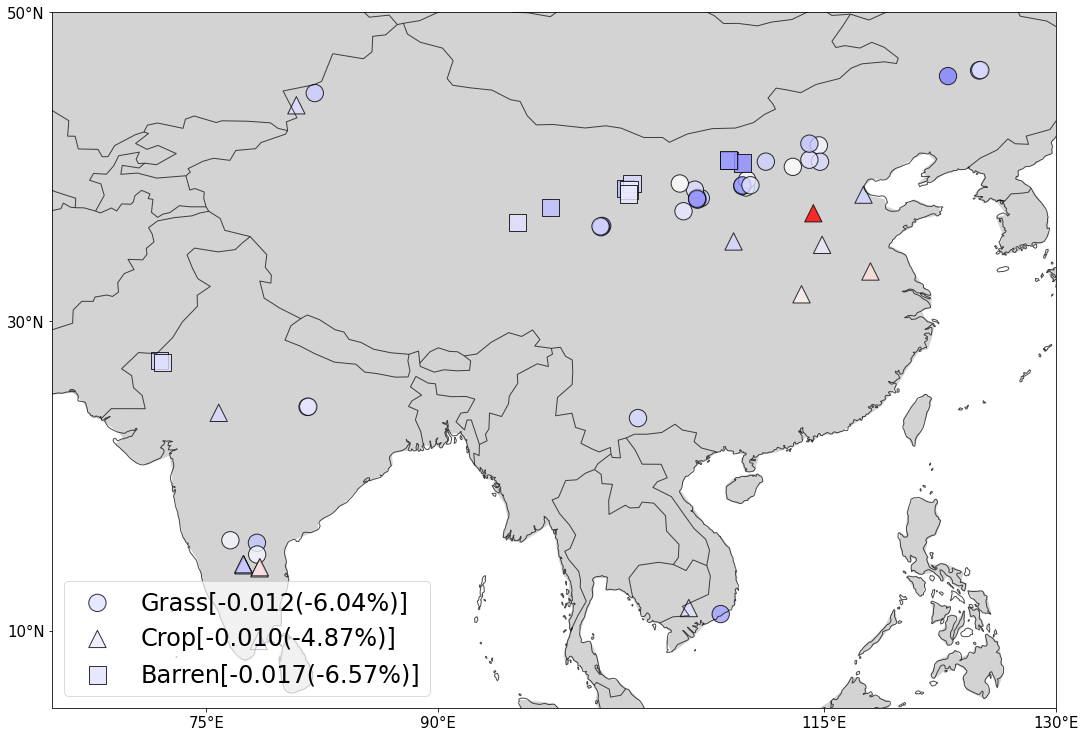

In [103]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((65,130,5,50),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([75,90,115,130], crs=ccrs.PlateCarree())
ax.set_xticklabels([75,90,115,130],fontsize=15)
ax.set_yticks([10,30,50], crs=ccrs.PlateCarree())
ax.set_yticklabels([10,30,50],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<130)&(pf_join['lon']>65) & (pf_join['lat']>5) & (pf_join['lat']<50)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

In [45]:
# diff = EA_sample[crop].year_mean_diff.median()*0.001
# rate = EA_sample[crop].year_diff_rate.median()

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [57]:
# print(('%.3f'%diff))
# print(('%.2f'%rate)+'%')
# print('Grass[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%'))

-0.010
-4.87%
Grass[-0.010(-4.87%)]


/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## 澳洲

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


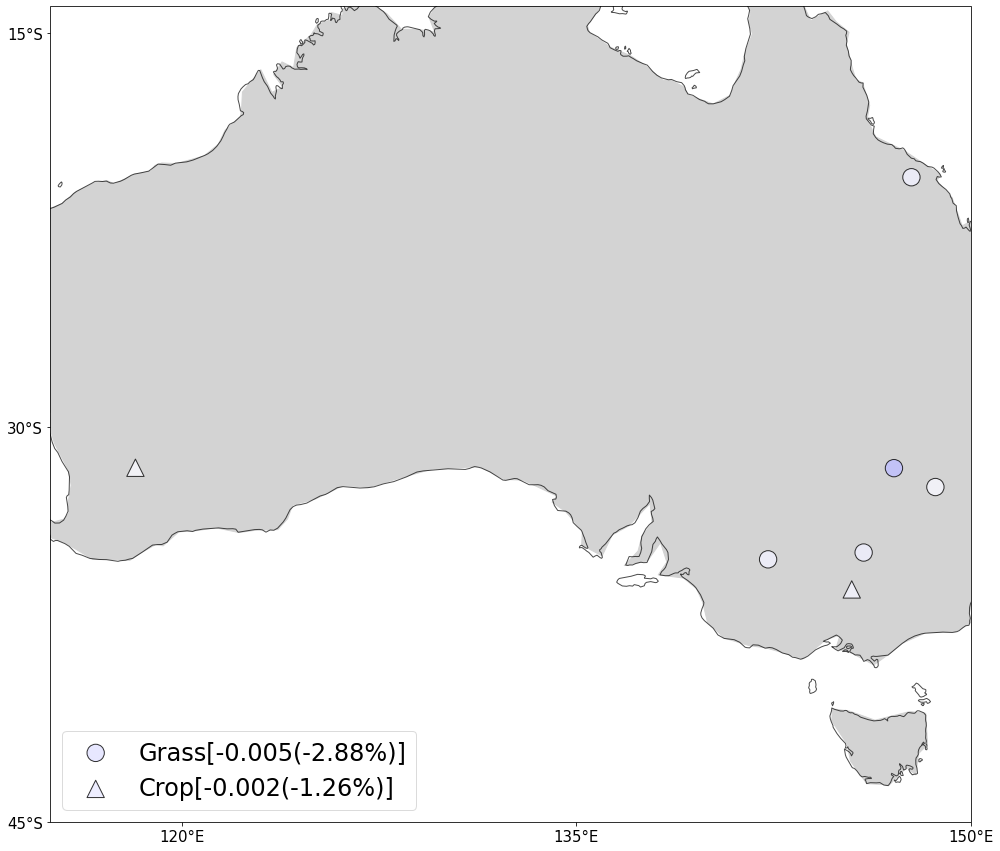

In [104]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((115,150,-14,-45),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([120,135,150], crs=ccrs.PlateCarree())
ax.set_xticklabels([120,135,150],fontsize=15)
ax.set_yticks([-15,-30,-45], crs=ccrs.PlateCarree())
ax.set_yticklabels([-15,-30,-45],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<150)&(pf_join['lon']>115) & (pf_join['lat']>-45) & (pf_join['lat']<-15)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
# plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 欧洲

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


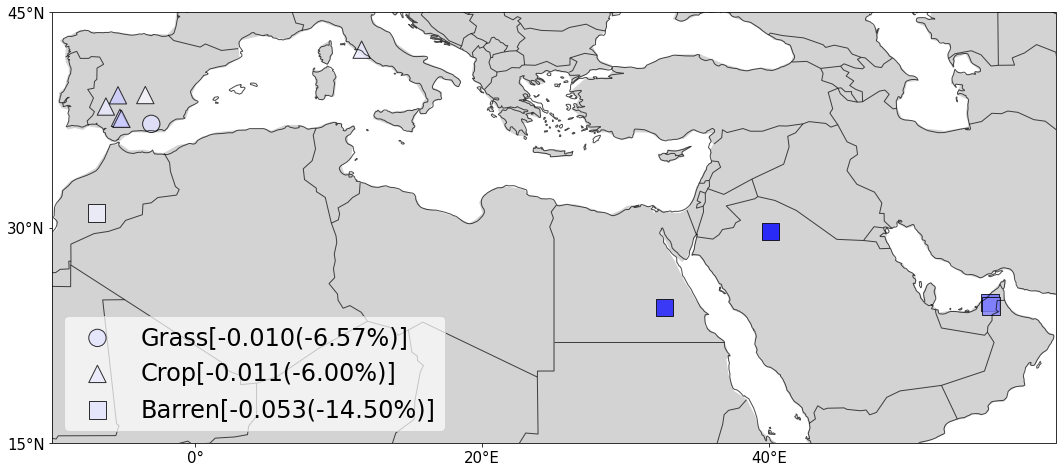

In [105]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-10,60,15,45),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([0,20,40], crs=ccrs.PlateCarree())
ax.set_xticklabels([0,20,40],fontsize=15)
ax.set_yticks([15,30,45], crs=ccrs.PlateCarree())
ax.set_yticklabels([15,30,45],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<60)&(pf_join['lon']>-10) & (pf_join['lat']>15) & (pf_join['lat']<45)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 北美

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


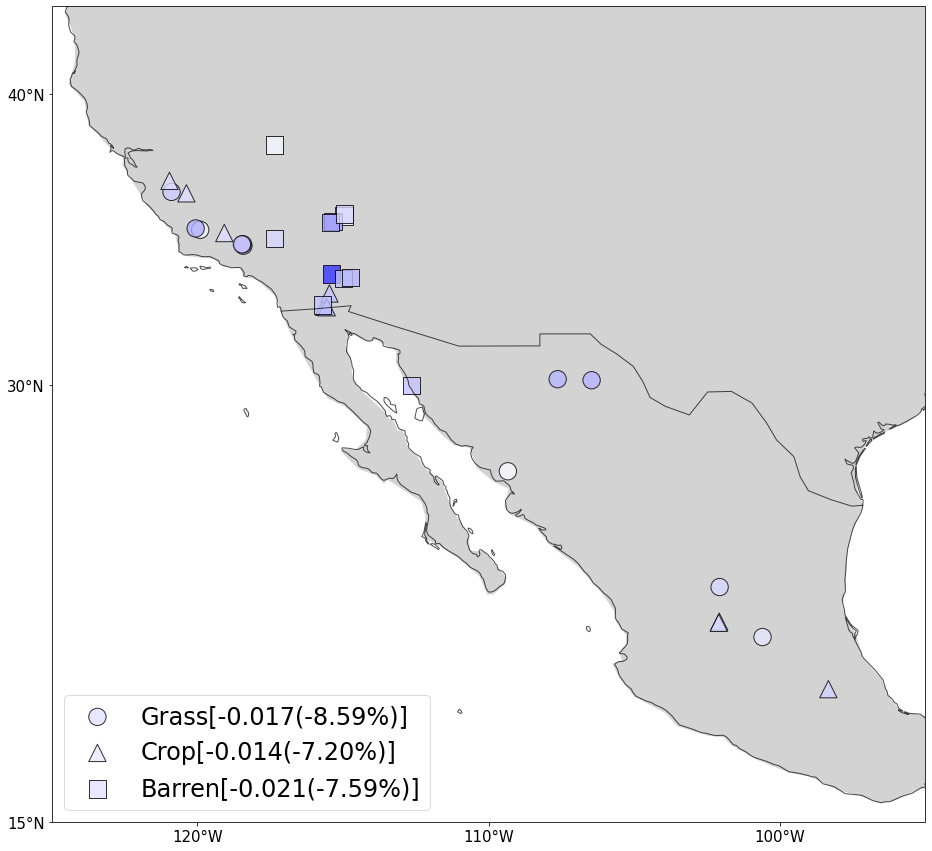

In [107]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-125,-95,15,43),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-120,-110,-100], crs=ccrs.PlateCarree())
ax.set_xticklabels([-120,-110,-100],fontsize=15)
ax.set_yticks([15,30,40], crs=ccrs.PlateCarree())
ax.set_yticklabels([15,30,40],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-95)&(pf_join['lon']>-125) & (pf_join['lat']>15) & (pf_join['lat']<43)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

## 南美

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


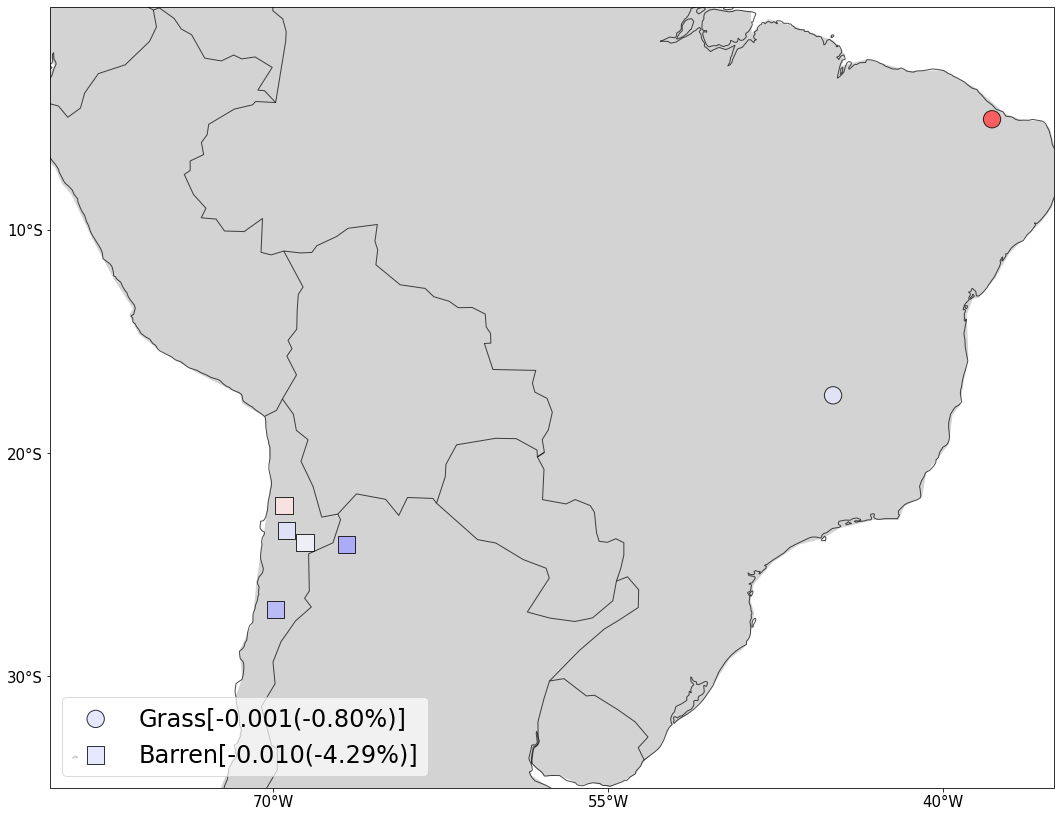

In [108]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-80,-35,0,-35),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-70,-55,-40], crs=ccrs.PlateCarree())
ax.set_xticklabels([-70,-55,-40],fontsize=15)
ax.set_yticks([-10,-20,-30], crs=ccrs.PlateCarree())
ax.set_yticklabels([-10,-20,-30],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='lightgrey')
ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-35)&(pf_join['lon']>-80) & (pf_join['lat']>-35) & (pf_join['lat']<0)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
# plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=24,frameon=True,framealpha = 0.7)
# position=plt.axes([0.55, 0.35, 0.2, 0.02])#位置[左,下,右,上]
# cb = plt.colorbar(cax=position, orientation='horizontal')#方向
# cb.ax.tick_params(labelsize=15)
plt.show()

/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/zjxu/anaconda3/envs/pf/lib/python3.7/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


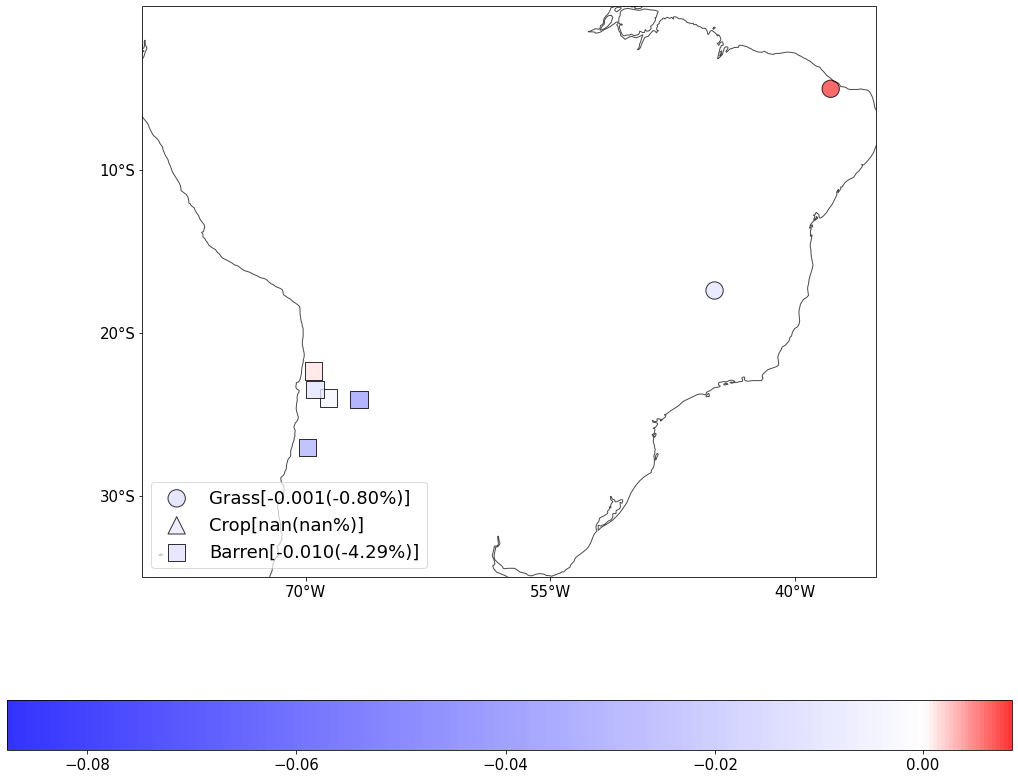

In [102]:
# 电站分布
# 变化率
# pf_info
# 空间分布图
fig=plt.figure(figsize=(18,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
# ax.stock_img()
ax.coastlines(alpha=0.7)
ax.set_extent((-80,-35,0,-35),crs=ccrs.PlateCarree())
# 标注坐标轴
ax.set_xticks([-70,-55,-40], crs=ccrs.PlateCarree())
ax.set_xticklabels([-70,-55,-40],fontsize=15)
ax.set_yticks([-10,-20,-30], crs=ccrs.PlateCarree())
ax.set_yticklabels([-10,-20,-30],fontsize=15)
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 添加网格线
# ax.grid()
# ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='k', alpha=0.35, linestyle='--')
# ax.gridlines(linestyle='--')
# 添加国境线
# ax.add_feature(cfeature.LAND.with_scale('110m'),facecolor='w')
# ax.add_feature(cfeature.BORDERS.with_scale('110m'),alpha=0.7)
# 绘图
cmp1 = plt.get_cmap('coolwarm')
z = pf_join['year_mean_diff']*0.001
norm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())
# pc = plt.pcolormesh(x,y,z, norm=norm, cmap="RdBu_r")
# 根据不同土地覆盖类型绘制
grass = pf_join['LC_merged'] == 'grass'
# pf_join[grass].info
crop = pf_join['LC_merged'] == 'croplands'
barren = pf_join['LC_merged'] == 'Barren'
others = (pf_join['LC_merged'] =='forest') & (pf_join['LC_merged'] == 'Shrublands') & (pf_join['LC_merged'] == 'wetlands')
colormap = 'bwr'
# 计算样本量
EA_sample =pf_join[(pf_join['lon']<-35)&(pf_join['lon']>-80) & (pf_join['lat']>-35) & (pf_join['lat']<0)]
count = EA_sample.LC_merged.value_counts()
# colormap = 'binary_r'
# colormap = 'summer_r'
# colormap = "RdYlGn"
# 定制标签
grass_label = 'Grass[%s(%s)]'%('%.3f'%(EA_sample[grass].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[grass].year_diff_rate.median())+'%')
crop_label = 'Crop[%s(%s)]'%('%.3f'%(EA_sample[crop].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[crop].year_diff_rate.median())+'%')
barren_label = 'Barren[%s(%s)]'%('%.3f'%(EA_sample[barren].year_mean_diff.median()*0.001), ('%.2f'%EA_sample[barren].year_diff_rate.median())+'%')
# 绘图
plt.scatter(pf_join[grass]['lon'], pf_join[grass]['lat'],c=pf_join[grass]['year_mean_diff']*0.001,norm=norm,marker='o',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=grass_label)  # 草地是圆
plt.scatter(pf_join[crop]['lon'], pf_join[crop]['lat'],c=pf_join[crop]['year_mean_diff']*0.001,norm=norm,marker='^',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=crop_label)  # 耕地是三角
plt.scatter(pf_join[barren]['lon'], pf_join[barren]['lat'],c=pf_join[barren]['year_mean_diff']*0.001,norm=norm,marker='s',edgecolors='k',cmap=colormap,s=300,alpha=0.8,label=barren_label)  # 裸地是方形
# plt.scatter(pf_join[others]['lon'], pf_join[others]['lat'],c=pf_join[others]['year_diff_rate'],norm=norm,marker='x',cmap = 'coolwarm',s=30)
# grass_marker = 
# plt.legend(loc=[.052,.4], fontsize=15, facecolor='w')
plt.legend(loc=3, fontsize=18,frameon=True,framealpha = 0.7)
# position=plt.axes([0.35, 0.45, 0.4, 0.02])#位置[左,下,右,上]
cb = plt.colorbar( orientation='horizontal')#方向
cb.ax.tick_params(labelsize=15)
plt.show()